### **Python review using adaptive incremental method for calculating roots of a function.**

Topics

*   Python basics
*   Functions
*   Formatted output
*   Plotting


#### **1. Functions**
**Write** a function to evaluate $f(x) = -8 + 3x-6 \sin(x)$ and **test** it for $x=2$.

In [1]:
%reset -f

import math
import numpy as np

def f(x):
    return -8 + 3*x -6 * math.sin(x)

print(f"f(2) = {f(2)}")  # uncomment this line to use this "print" statement

f(2) = -7.45578456095409


#### **2. Loops**

**Print** the value of $f(x)$ for numPoints equally spaced values of $x$ between $x_1$ and $x_2$, including the endpoints. This time we will designate $x_1$,$x_2$ as $0$ and $10$ respectively and set numPoints = $9$

In [2]:
x1, x2 = 0., 10.;   numPoints = 9
delta = (x2-x1)/(numPoints-1)
x = 0

for i in range(numPoints):
    print(f"{x}, {f(x):.2f}")
    x += delta

0, -8.00
1.25, -9.94
2.5, -4.09
3.75, 6.68
5.0, 12.75
6.25, 10.95
7.5, 8.87
8.75, 14.50
10.0, 25.26


#### **3. Formatting Printouts**

This printout is awkward to read. Let's print it out again, but use formatting that specifies the width of each column and the number of decimal places.
Here is a good source of information on [print formatting](https://www.geeksforgeeks.org/python-output-formatting/). Print out $x$ truncated to 2 decimal places and $f(x)$ truncated to 5 decimal places.

In [3]:
print("{0:^8s} {1:^12s}".format('   x', '   f(x)'))  # "^" causes center justification
x = 0

xPoints = []
yPoints = []
for i in range(numPoints):
    xPoints.append(x)
    yPoints.append(f(x))
    #the line below spaces the input nicely
    print("{0:8.2f} {1:12.5f}".format(x, f(x)))
    x += delta

     x        f(x)   
    0.00     -8.00000
    1.25     -9.94391
    2.50     -4.09083
    3.75      6.67937
    5.00     12.75355
    6.25     10.94908
    7.50      8.87200
    8.75     14.50166
   10.00     25.26413


#### **4. Plotting**

Plot the function $f(x)$ from $x_1$ to $x_2$

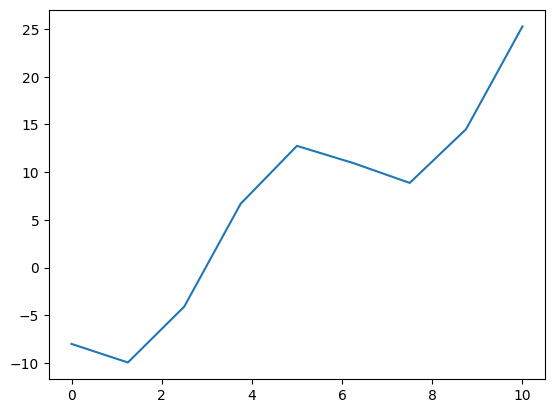

In [4]:
import matplotlib.pyplot as plt

plt.plot(xPoints, yPoints)

#### **5. Using linspace**

Plot the function $f(x)$ from $0$ to $9$ again, but replace the for loop that generates the points with [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

This code uses a characteristic of python functions that is not available in all programming languages.

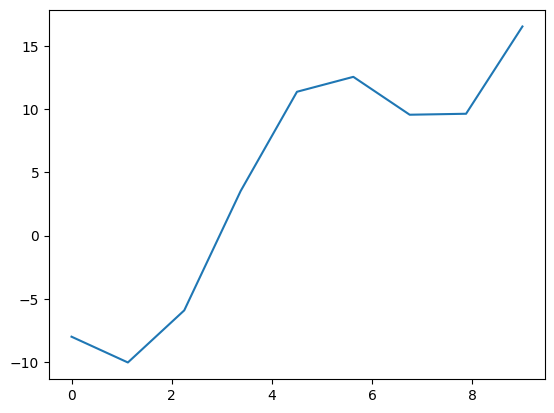

In [5]:
xPoints = np.linspace(0, 9, 9)
yPoints = []
for x in xPoints:
    yPoints.append(f(x))

plt.plot(xPoints, yPoints)

Add [axis labels](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) and [title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) to plot and increase numPoints to get a smoother plot

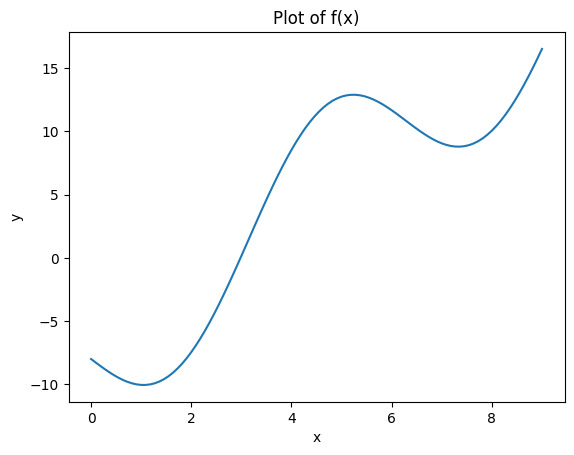

In [6]:
xPoints = np.linspace(0, 9, 100)
yPoints = []
for x in xPoints:
    yPoints.append(f(x))

plt.plot(xPoints, yPoints)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of f(x)")
plt.show()

#### **6. Adaptive Incremental Method**
Now we want to find out where the function is zero using the adaptive incremental method.
We will increment from $x_1$ to $x_2$ searching for when $f(x)$ switches sign. When the value of $f(x)$ switches sign, we know we have a root between the current and last values of $x$. You can use either a "for" or "while" loop.

There is no "sign" function in the core python. There is in numpy, but let's write our own. This will be used in the subsequent code. This function should return $-1$ if $f(x)<0$, $0$ if $f(x)=0$, and $1$ if $f(x)>0$.

In [7]:
def sign(num):
    return 1 if num > 0 else 0

Use an increment of $(x_2-x_1)/10$. When the sign changes, print out the last and current values of $x$ and declare there is a root between these two values.

In [8]:
delta = (x2-x1)/10
x = x1

while sign(f(x)) == sign(f(x1)):
    x += delta

#for example
#x values are 1, 2, 3 with an increment of 1
#y values are 10, 5, -1
x2 = x #3
x1 = x - delta #2
print(f"There is a root between {x1} and {x2}")

There is a root between 2.0 and 3.0


Now the search is narrowed, restart the incrementing from this reduced range of $x$.

In [9]:
delta = (x2-x1)/10
x = x1

while sign(f(x)) == sign(f(x1)):
    x += delta

x2 = x
x1 = x - delta
print(f"There is a root between {x1} and {x2}")

There is a root between 2.900000000000001 and 3.000000000000001


Now it is time to automate the search. Start with a search range of $x_1$ to $x_2$ and start incrementing until the sign switches. Automatically reduce the range and resume searching. Continue doing this until $f(x)$ is less than $1.0E-6$.
* Each time you start incrementing, print out a message that identifies the bracket for the search and the values of $f(x)$ at the ends of the bracket.
* Store the history of brackets in a [text file](https://www.pythontutorial.net/python-basics/python-read-text-file/) called bracketHistory.txt.
* If you are using Google Colab, opening a file for writing takes a little more effort than if you are using Jupyter or JupyterLab.

In [10]:
import sys
import os

IDE = 'jupyterlab'
# IDE = 'colab'

if IDE == 'colab':
    from google.colab import drive
    #This is going to request permission
    drive.mount('/content/gdrive', force_remount=True)

x1 = 0
x2 = 10


def adaptInc(x1,x2,n):
  pass  # delete this once you start writing the function
  # define a function that takes in your starting endpoints and number of points
  # return a bracket (list) of two new x values, between which is the root

# THESE ARE CONDITIONALS TO SAVE YOUR TEXT FILE. YOU DO NOT NEED TO CHANGE THEM.
if IDE == 'colab':
    path = '/content/gdrive/MyDrive/Colab Notebooks'
    print(os.listdir('/content/gdrive/MyDrive/Colab Notebooks'))

if IDE == 'jupyterlab':
    path = './'
    tmp = os.listdir(path)
    print(np.array([tmp]).T)

file = open(path +'/bracketHistory.txt', 'w')

# Create a loop that runs while the absolute value of the second endpoint is above 1E-6
  # Within this loop, write each list of endpoints to the text file
  # Also print the endpoints and the current function values at those endpoints
  # Remember to redefine the endpoints in each loop

file.close()


[['Lab1.ipynb']]


Now read back the file that you created in the previous section.

In [11]:
# See the "text file" link above to learn how to do this,
# then implement it in this code block

Use what you have written to create a function that will search for roots using the adaptive incremental method. You will send this solver function the function for which you want the root, the bracket to start the search, and the tolerance (i.e. mab(abs(f(x))) allowed)

In [12]:
def adaptiveIncremental(f, bracket, tol):
  pass

root = adaptiveIncremental(f, [0,10], 1E-6)

print('the root is at x =', root)

# Let's try a new function and a new initial range (no need to change this)
def f(x):
  return x

root = adaptiveIncremental(f, [-10,10], 1E-6)

print('the root of f(x) = x is at x =', root)

the root is at x = None
the root of f(x) = x is at x = None


For more information on any of the python functionalities, explore these resorces.

*   [Print Formatting](https://www.geeksforgeeks.org/python-output-formatting/)
*   [Axes Labels](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)
*   [Plot Titles](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)
*   [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   [Text files](https://www.pythontutorial.net/python-basics/python-read-text-file/)
*   [Exploring Directories](https://colab.research.google.com/notebooks/io.ipynb) in colab (look at the section titled "Mount Google Drive Locally")


